In [2]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Model + Data Loading

In [4]:
import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import load, load_dataloader
from model import *
from utils import *
from bert import tokenization

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
pp = pprint.PrettyPrinter(indent=4)
ID = "JUNE25-10K-6LAYER"

# IMDB

Total Time: 1088.8178 
Train Time: 244.4757
Max (Validation, Train): (0.87, 0.96)


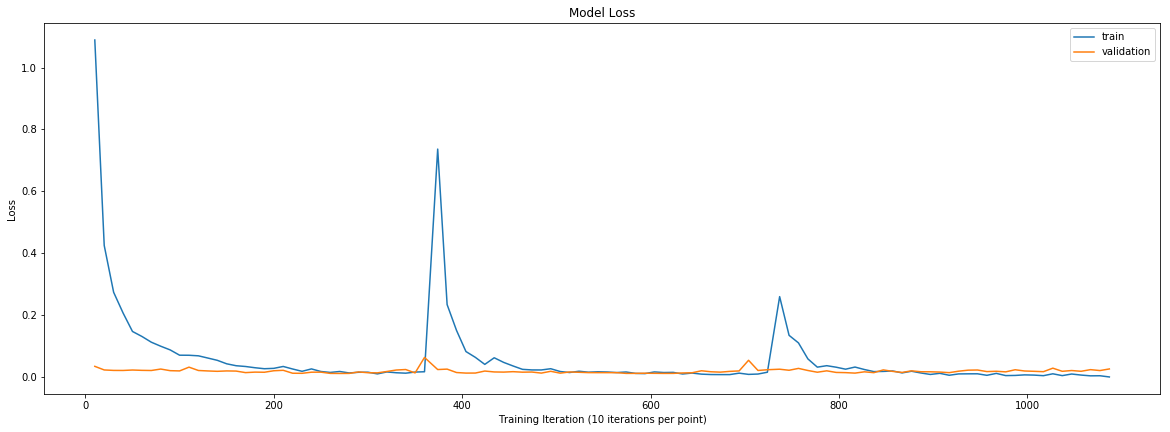

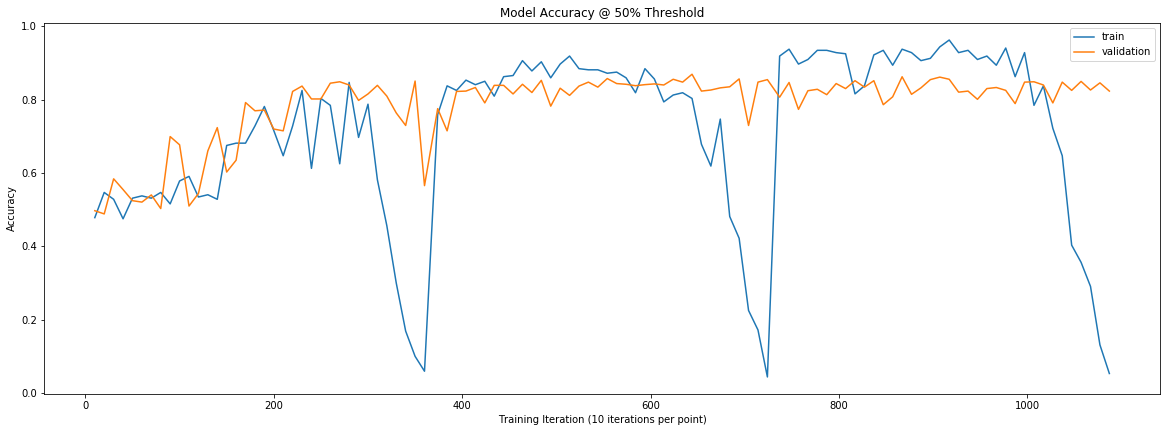

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '10000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [25]:
model_path = 'complete_IMDB-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 1175.7849 
Train Time: 298.4528
Max (Validation, Train): (0.87, 0.97)


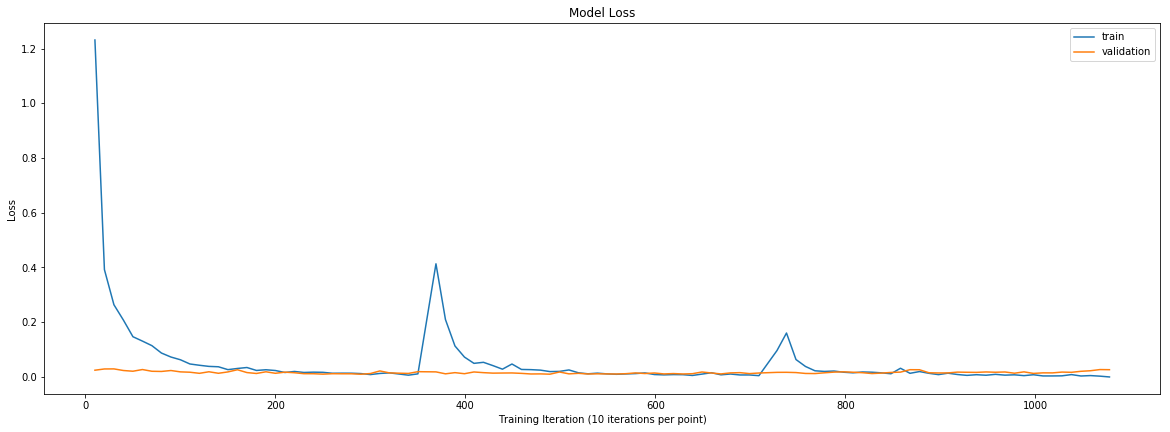

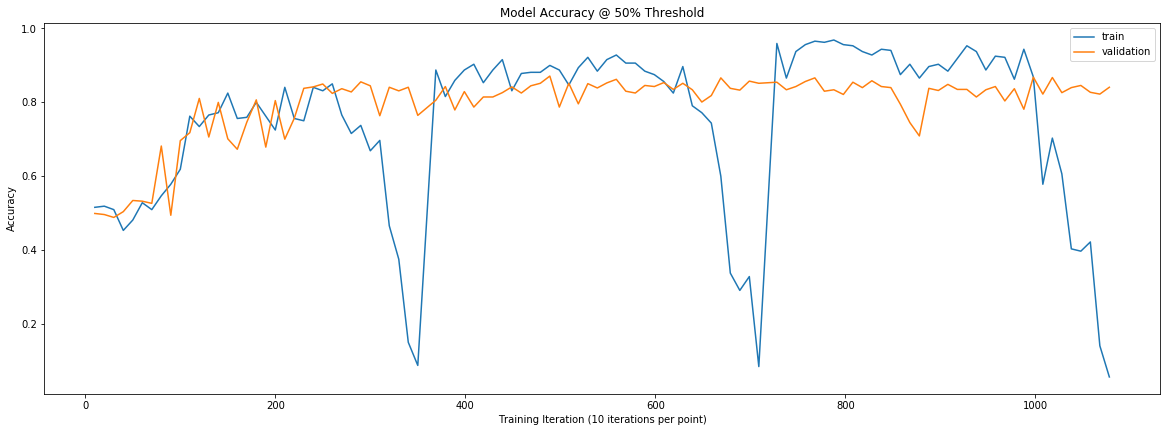

{   '--COLA': False,
    '--IMDB': True,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '10000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [26]:
model_path = 'complete_IMDB-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.87, 0.96)
Total Time: 1088.8178 
Train Time: 244.4757
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.87, 0.97)
Total Time: 1175.7849 
Train Time: 298.4528


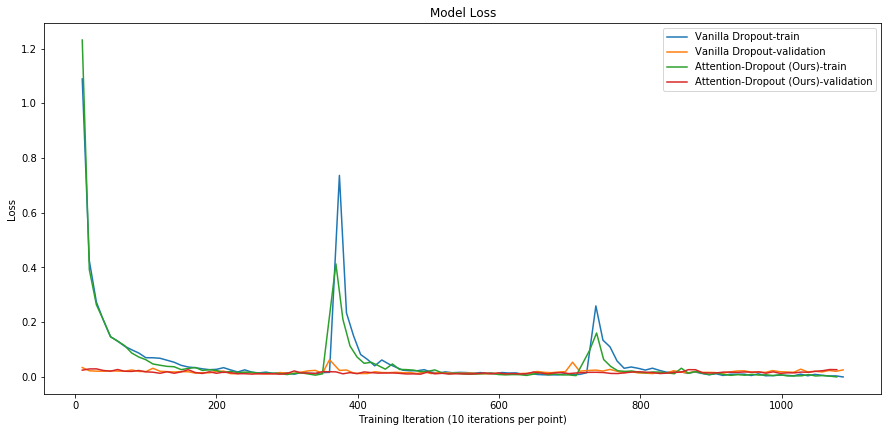

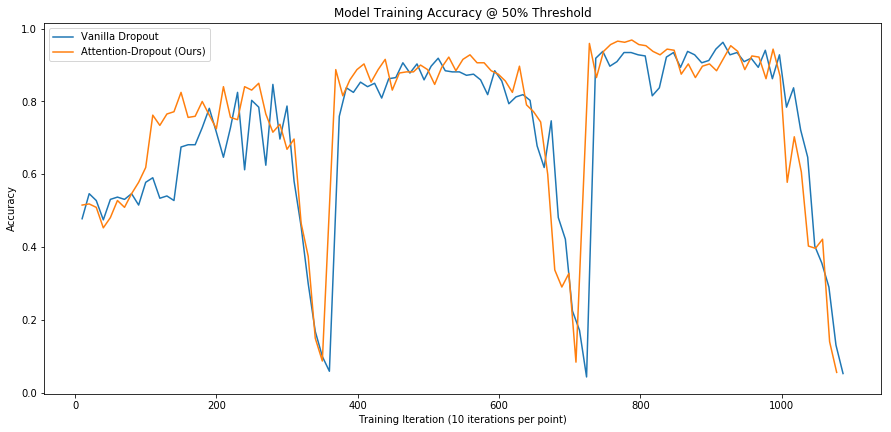

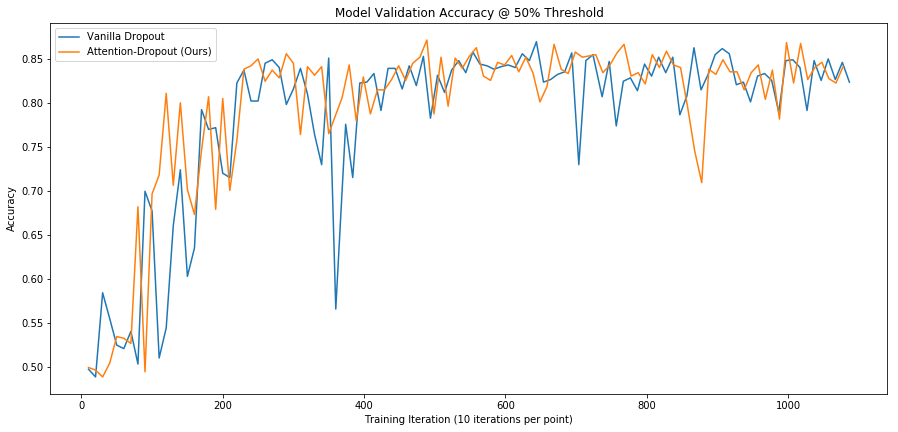

In [27]:
compare_metrics([m1, m2], first_n=None)

# COLA

In [11]:
model_path = 'complete_COLA-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
# plot_metrics(m1, first_n=None)
# pp.pprint(m1['args'])

In [12]:
model_path = 'complete_COLA-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
# plot_metrics(m2, first_n=None)
# pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.65, 0.75)
Total Time: 169.499 
Train Time: 125.1899
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.65, 0.77)
Total Time: 207.2316 
Train Time: 160.3397


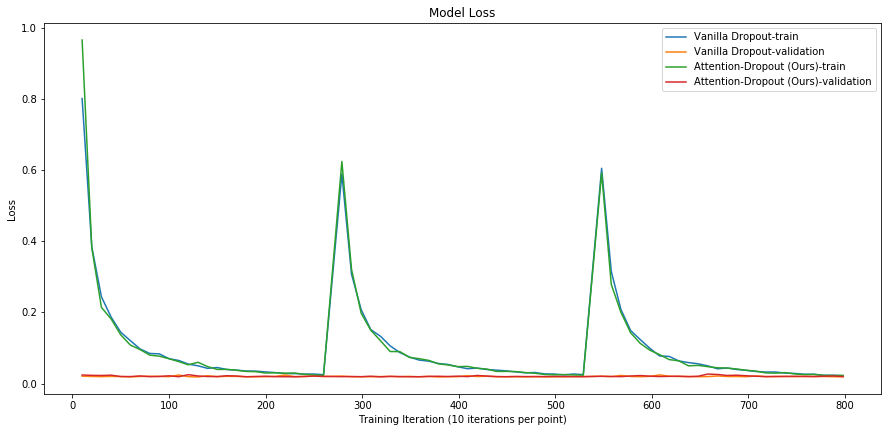

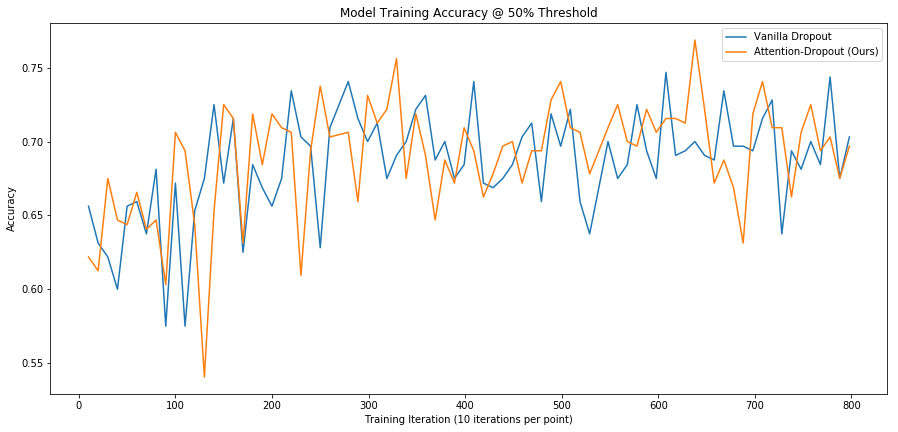

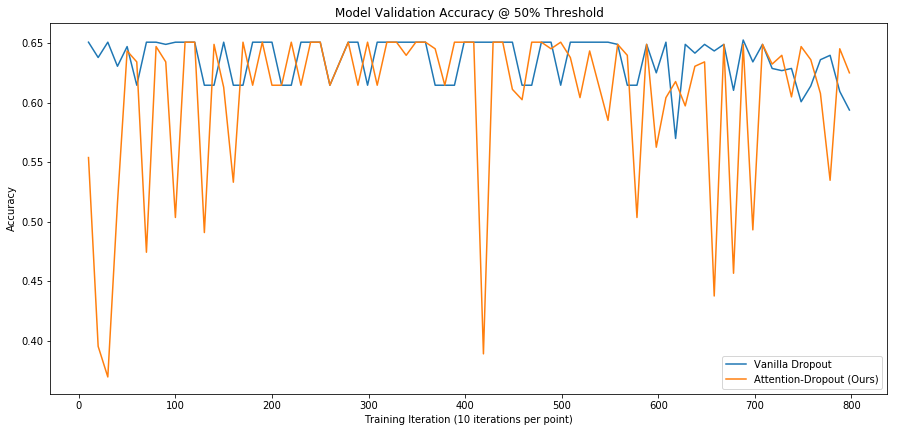

In [10]:
compare_metrics([m1, m2], first_n=None)

# QNLI

Total Time: 457.6772 
Train Time: 161.9838
Max (Validation, Train): (0.59, 0.72)


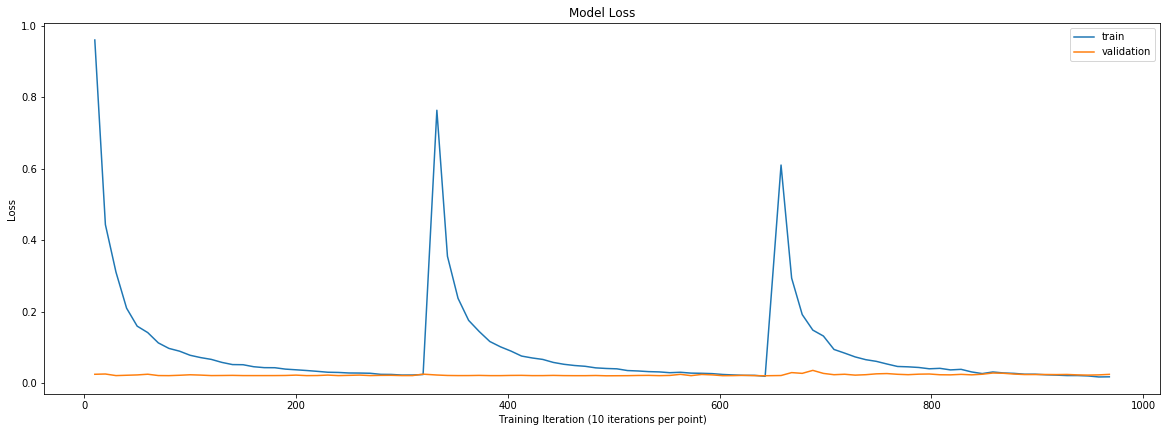

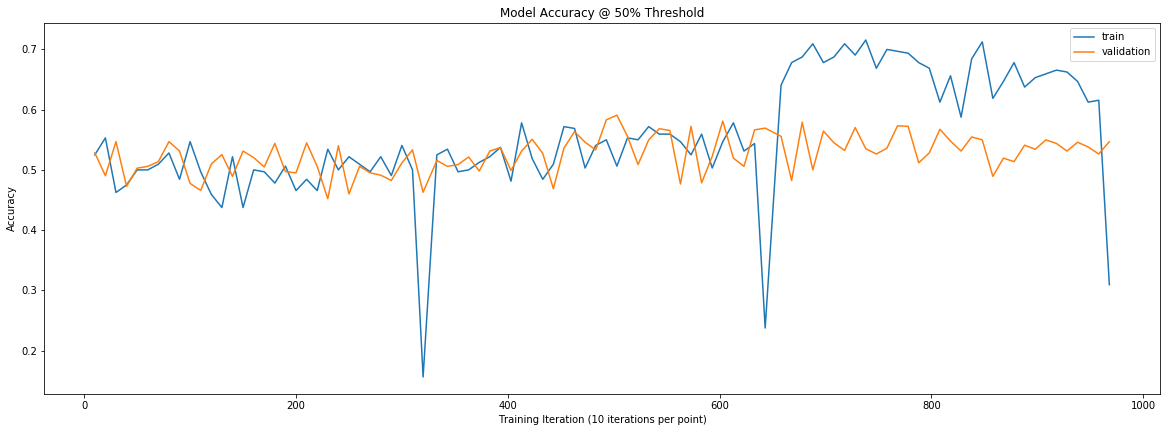

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '10000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [13]:
model_path = 'complete_QNLI-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 518.9802 
Train Time: 217.9256
Max (Validation, Train): (0.58, 0.78)


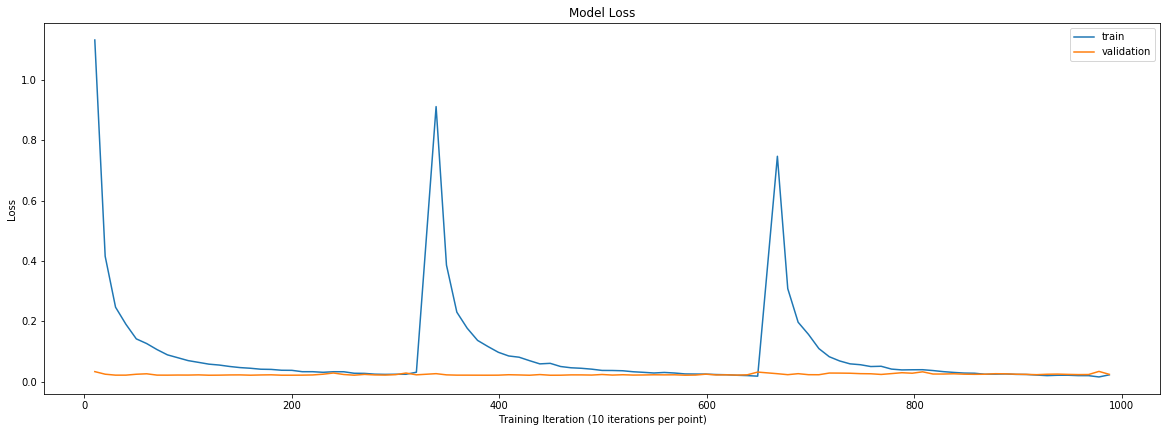

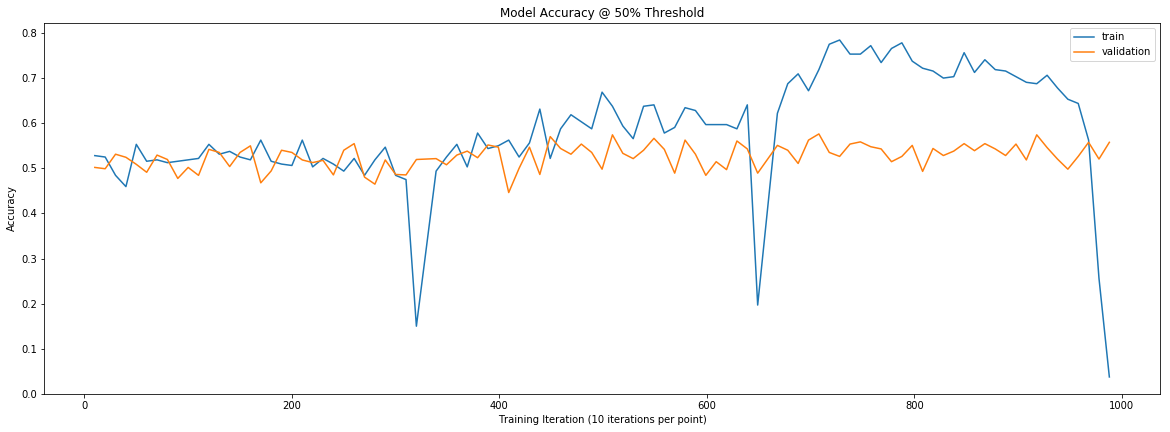

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '10000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [14]:
model_path = 'complete_QNLI-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.59, 0.72)
Total Time: 457.6772 
Train Time: 161.9838
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.58, 0.78)
Total Time: 518.9802 
Train Time: 217.9256


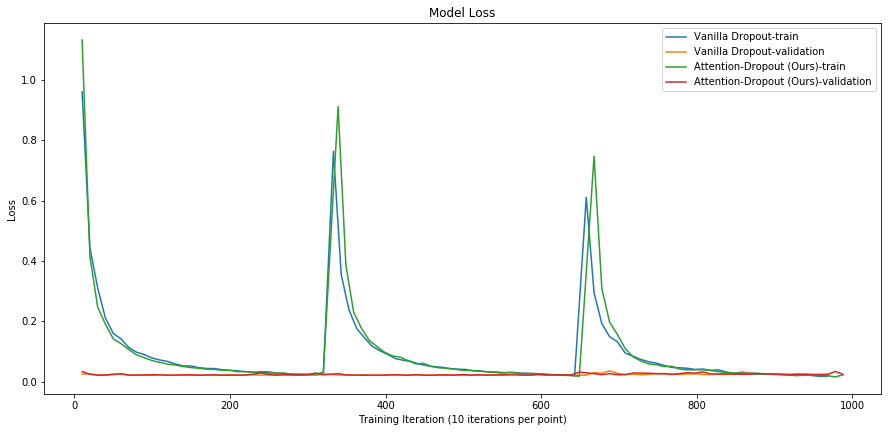

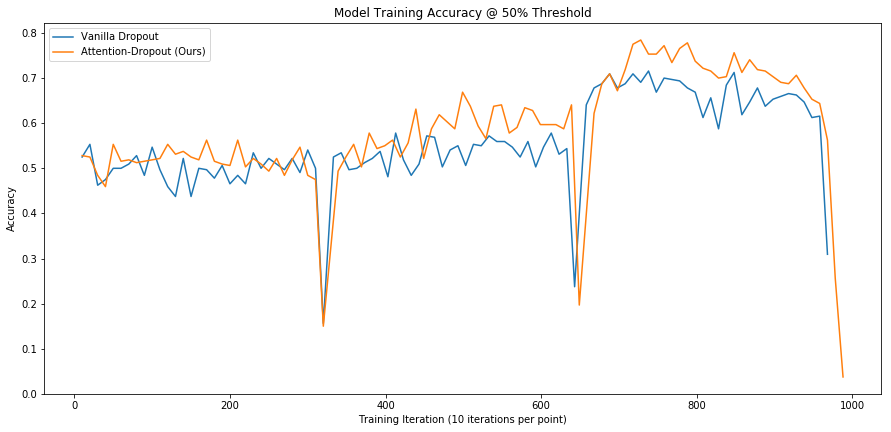

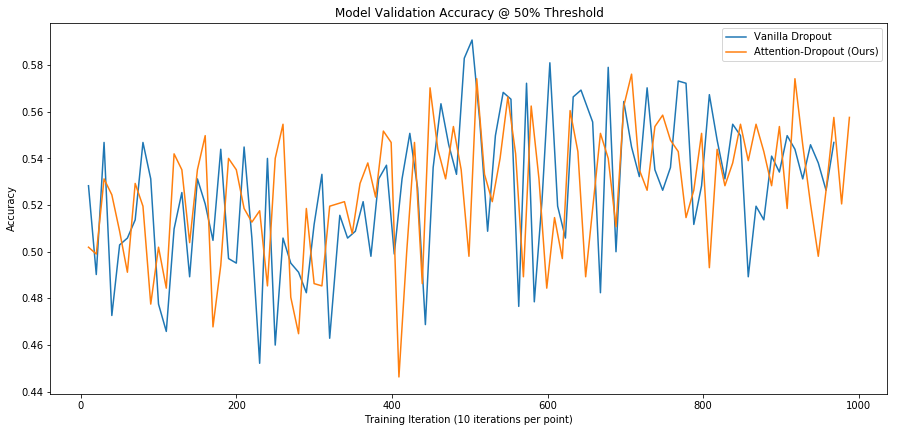

In [15]:
compare_metrics([m1, m2], first_n=None)

# QQP

Total Time: 95.1456 
Train Time: 37.3551
Max (Validation, Train): (0.68, 0.64)


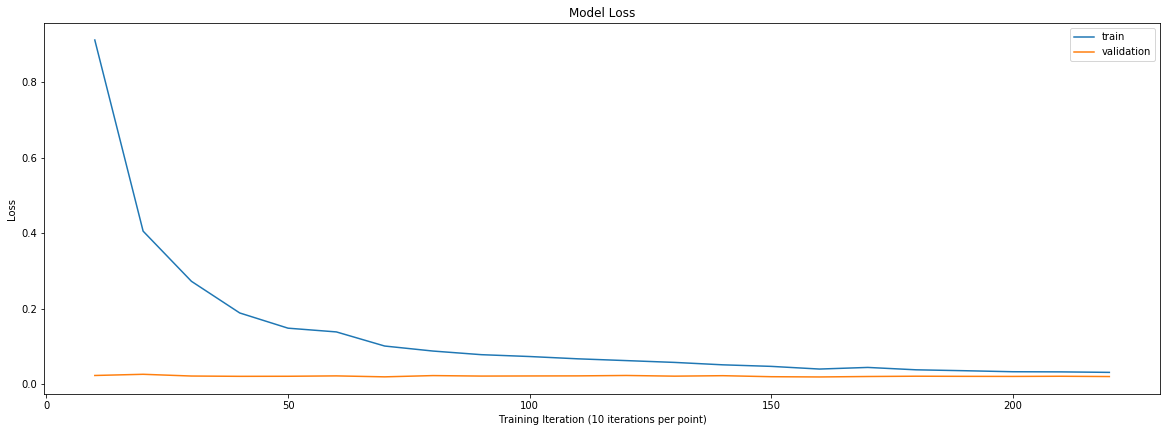

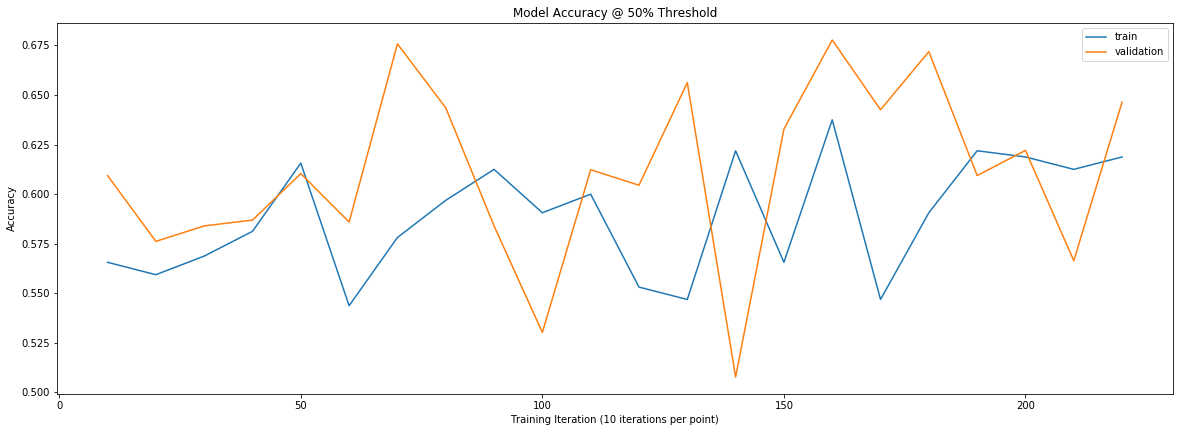

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '10000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [18]:
# model_path = 'complete_QQP-VD-{}'.format(ID)
model_path = 'cancel_e=0_itr=225QQP-VD-JUNE25-10K-6LAYER'
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 447.708 
Train Time: 208.4126
Max (Validation, Train): (0.77, 0.85)


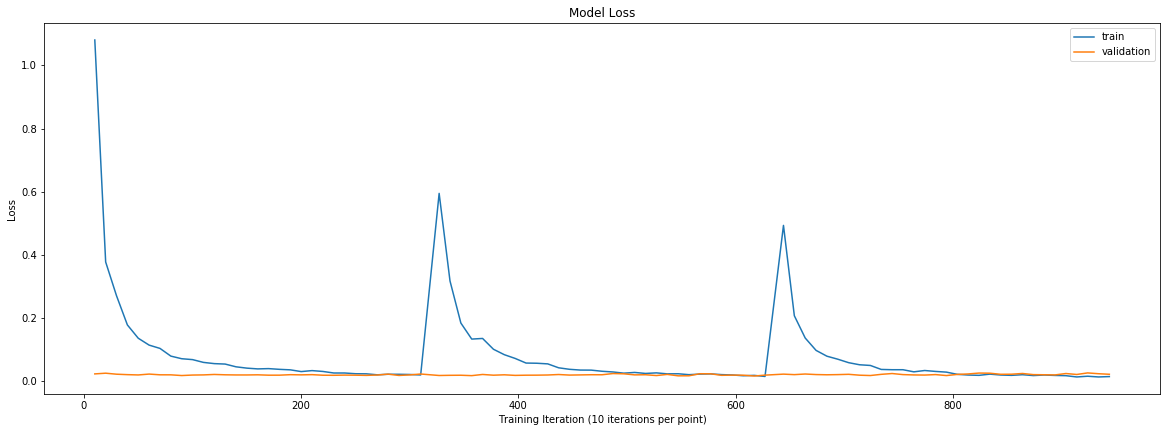

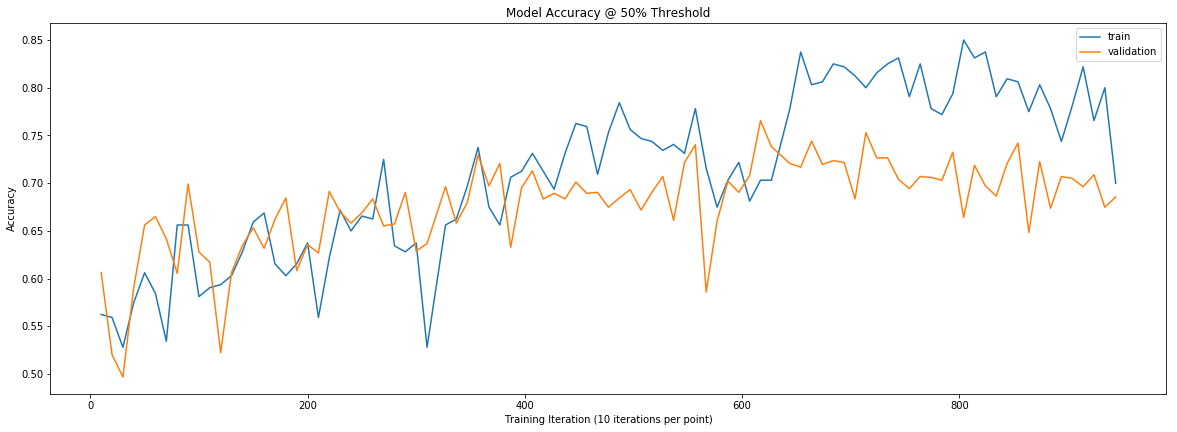

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '10000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [17]:
model_path = 'complete_QQP-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.68, 0.64)
Total Time: 95.1456 
Train Time: 37.3551
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.77, 0.85)
Total Time: 447.708 
Train Time: 208.4126


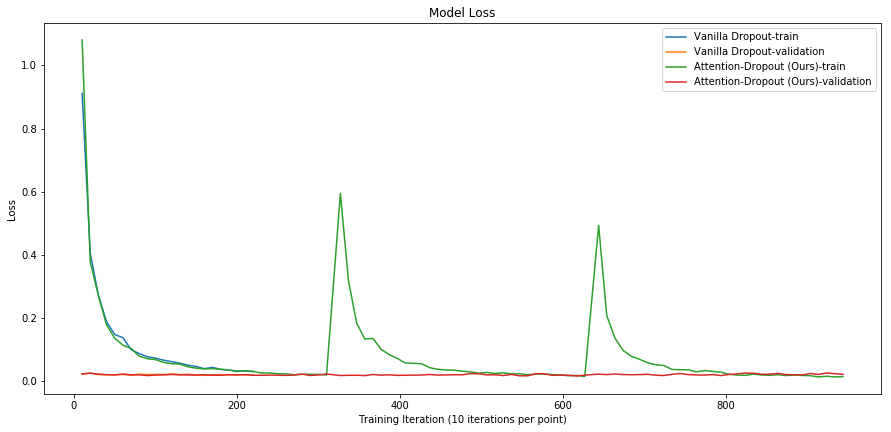

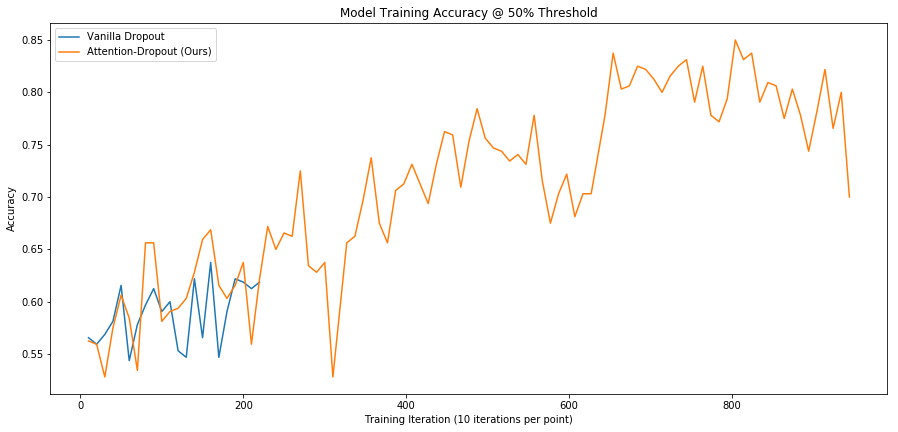

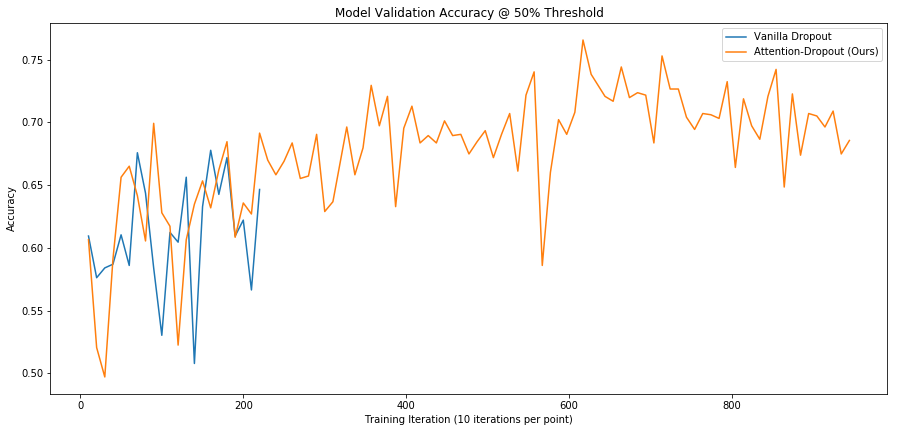

In [19]:
compare_metrics([m1, m2], first_n=None)

# RTE

Total Time: 89.0278 
Train Time: 47.7002
Max (Validation, Train): (0.23, 0.54)


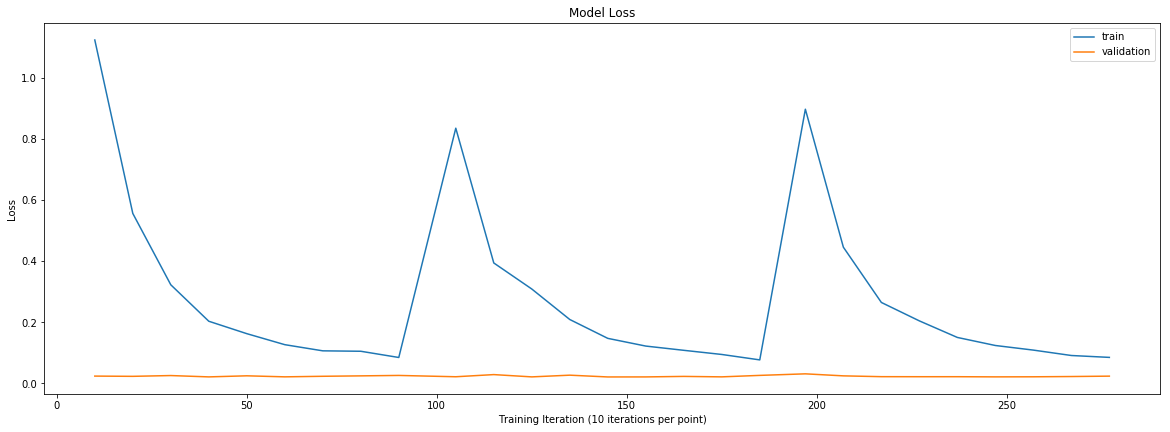

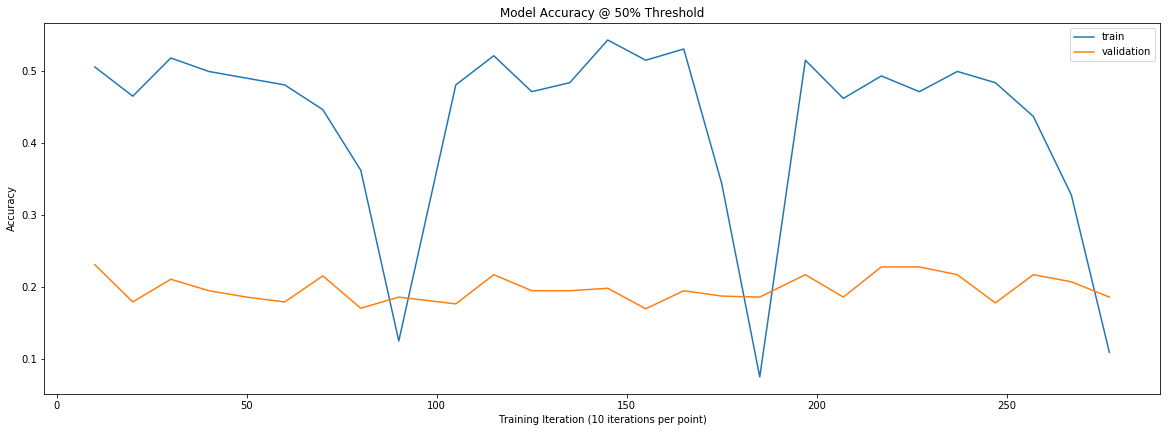

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': True,
    '--attention-dropout': False,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [20]:
model_path = 'complete_RTE-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 105.532 
Train Time: 60.5877
Max (Validation, Train): (0.24, 0.55)


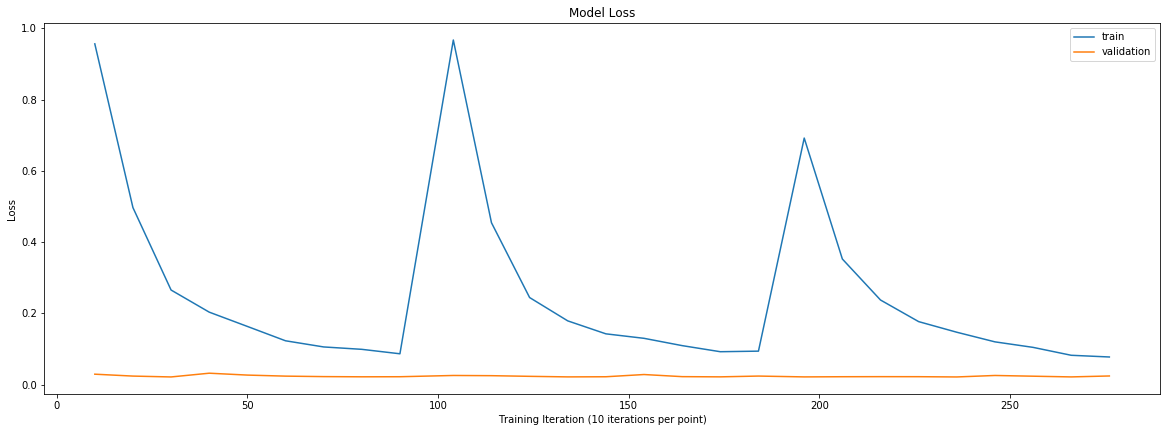

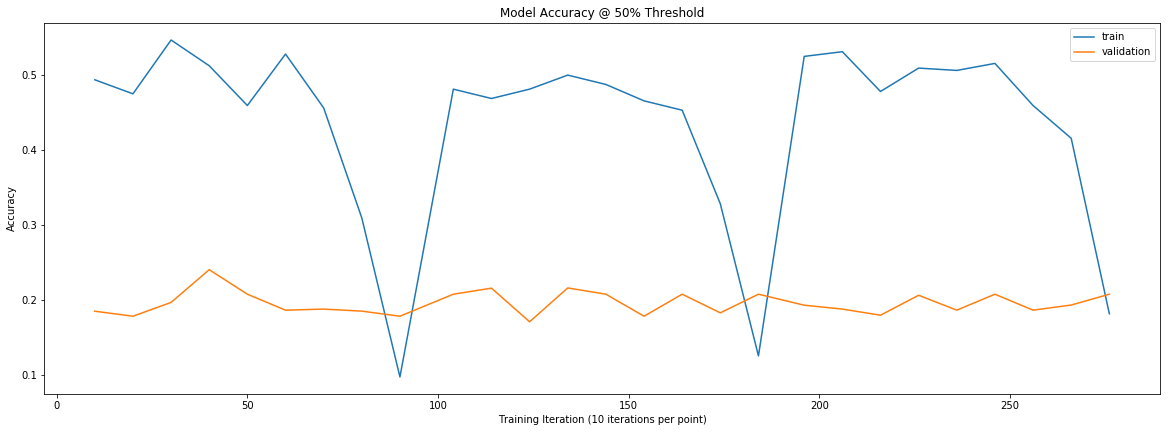

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': False,
    '--RTE': True,
    '--attention-dropout': True,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.1',
    '--dset-size': '0',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '1000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '10'}


In [21]:
model_path = 'complete_RTE-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.23, 0.54)
Total Time: 89.0278 
Train Time: 47.7002
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.24, 0.55)
Total Time: 105.532 
Train Time: 60.5877


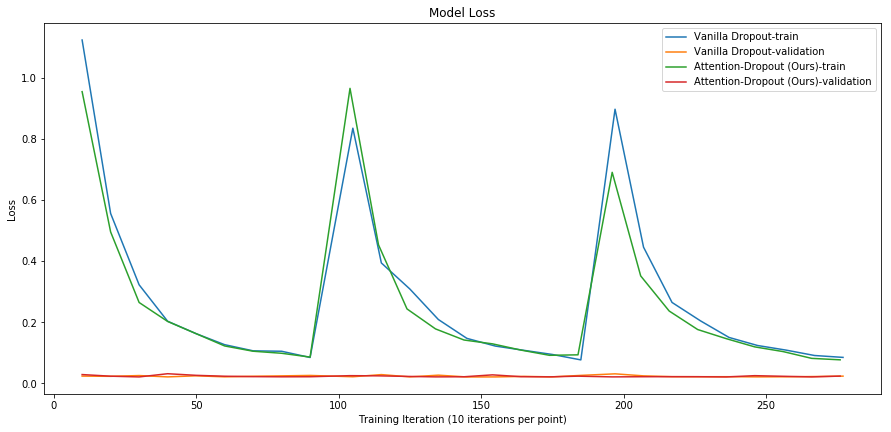

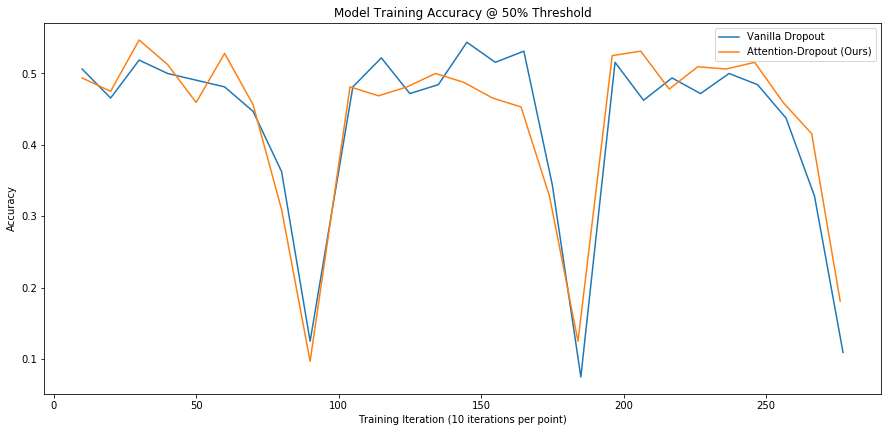

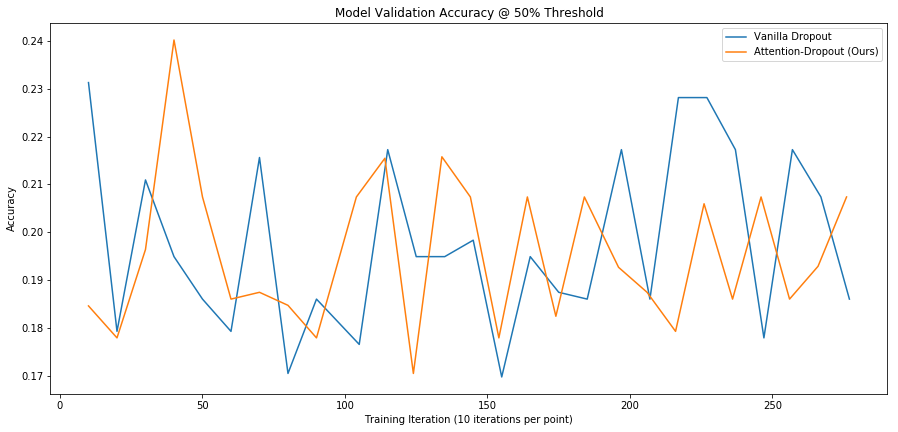

In [22]:
compare_metrics([m1, m2], first_n=None)